# Tutorial 1: Introduction to dataset and site effect detection

In [1]:
addpath('../src/');
addpath('../src/mwwTest/')

In [2]:
%PRNI 2017

%Hands on session - site effect estimation and visualization
%===========================================================

%1) Load ABIDA data by typing 

load('../data/ABIDE_controlData_7Sites.mat');
load('../data/cc200Map2Communities.mat');

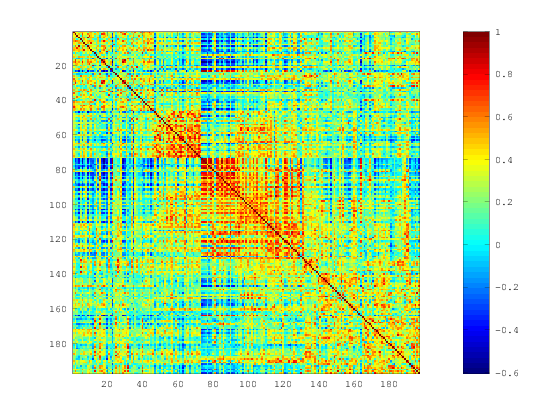

In [3]:
%2) visualize community structure of two selected subject i from dataset d

[~,parcelOrderByCommunity]=sort(mapToCommunities);
i=5;%can be modified
d=1;%can be modified
data_i=squeeze(data{d}.signals(i,:,:))';
data_i_byCommunity=data_i(:,parcelOrderByCommunity);
figure;
imagesc(corr(data_i_byCommunity));
colorbar;


In [4]:
%For the same data, estimate the level of agreemnet with the known community structure:
[ hom_com sep_com mw_com wbRat] = compareWithinAndBetweenGroupsSim( corr(data_i), mapToCommunities )
communityAgrmntScore=mw_com.stats.zval;


MANN-WHITNEY-WILCOXON TEST


---------------------------------------------------------------------------


				Group 1		Group 2


numerosity			17565		1741


Sum of Ranks (W)		161184055.0		25186416.0


Mean rank			9176.4		14466.6


Test variable (U)		23670005.0		6910660.0


---------------------------------------------------------------------------


Sample size is large enough to use the normal distribution approximation


Mean					15290332.5


Standard deviation			221814.6560


Z corrected for continuity	37.7778		37.7778


p-value (1-tailed)			0.00000


p-value (2-tailed)			0.00000


---------------------------------------------------------------------------


hom_com =  0.45251


sep_com =  0.21811


mw_com =


  scalar structure containing the fields:


    stats =


      scalar structure containing the fields:


        zval =  37.778


        ranksum =  161184055


    p = 0


    h =  1


wbRat =  2.0746


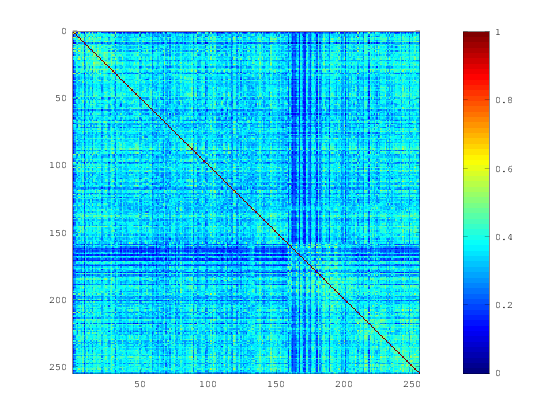

In [5]:
%Extract a map of sites for each subject

 numParcels=length(mapToCommunities);
 subSiteMap=[];
 for d=1:length(data)
   numSubs_d=size(data{d}.signals,1);
    subSiteMap=[subSiteMap;ones(numSubs_d,1)*d];
 end
 numSubs=length(subSiteMap);

%Extract a pairwise correlations for each subject:
 pos=1;
 corrPos=find(triu(ones(numParcels),1));
 corrData=zeros(numSubs,length(corrPos));
 for d=1:length(data)
  signals_d=data{d}.signals;
  for sub=1:size(signals_d,1)
  	data_d_s=squeeze(signals_d(sub,:,:));
  	corr_d_s=corr(data_d_s');
  	corrData(pos,:)=corr_d_s(corrPos);
  	pos=pos+1;
  end
 end

%Extract pairwise sim matrix between subjects based on all correlation values:
subSimMat=corr(corrData');
figure;
imagesc(subSimMat);
colorbar;


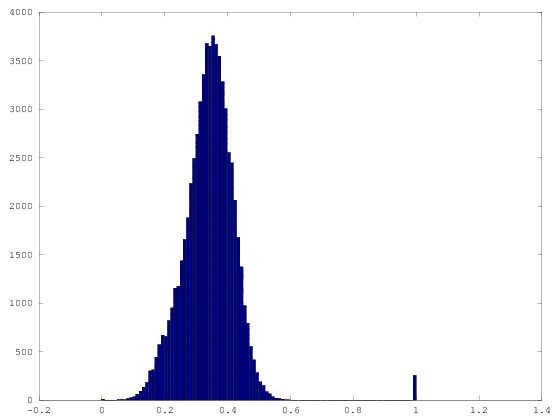

In [6]:
hist(subSimMat(:),100);

In [7]:
% Estimate site effect across all sites:
 [ baselineSE.hom baselineSE.sep baselineSE.mw baselineSE.wbRat] = compareWithinAndBetweenGroupsSim( subSimMat, subSiteMap);
 baselineSE.hom
 baselineSE.sep
 baselineSE.mw
 baselineSE.wbRat

MANN-WHITNEY-WILCOXON TEST


---------------------------------------------------------------------------


				Group 1		Group 2


numerosity			25210		7175


Sum of Ranks (W)		399502350.0		124907955.0


Mean rank			15847.0		17408.8


Test variable (U)		99164055.0		81717695.0


---------------------------------------------------------------------------


Sample size is large enough to use the normal distribution approximation


Mean					90440875.0


Standard deviation			698691.4171


Z corrected for continuity	12.4850		12.4850


p-value (1-tailed)			0.00000


p-value (2-tailed)			0.00000


---------------------------------------------------------------------------


ans =  0.35206


ans =  0.33607


ans =


  scalar structure containing the fields:


    stats =


      scalar structure containing the fields:


        zval =  12.485


        ranksum =  399502350


    p = 0


    h =  1


ans =  1.0476


### Repeat the above comparison focusing on a subset of the sites